In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import sys
import importlib.util 

file_path = r"C:\Users\kurt-\Documents\GitHub\GNN_Soil_Dynamics\TF Functions\TTF.py"

# Add the directory containing TTF.py to the system path
sys.path.append(r'C:\Users\kurt-\Documents\GitHub\GNN_Soil_Dynamics\TF Functions')

# Import the module
spec = importlib.util.spec_from_file_location("TTF", file_path)
TTF = importlib.util.module_from_spec(spec)
spec.loader.exec_module(TTF)

In [7]:
def Base_case_extraction(array):
    # Extract unique values
    Vs_unique = np.unique(array)
    Vs1 = Vs_unique[0]
    Vs2 = Vs_unique[1]

    # Extract the height as the number of repetitions of Vs1
    Vs1_count = np.count_nonzero(array == Vs1)
    h = Vs1_count*5
    return Vs1, Vs2, h

In [8]:
Vs = [166.30786881874639,166.30786881874639,821.1231911447858]
Vs = np.array(Vs)

In [9]:
Vs1, Vs2, h = Base_case_extraction(Vs)
print(f"Vs1: {Vs1}, Vs2: {Vs2}, h: {h}")

Vs1: 166.30786881874639, Vs2: 821.1231911447858, h: 10


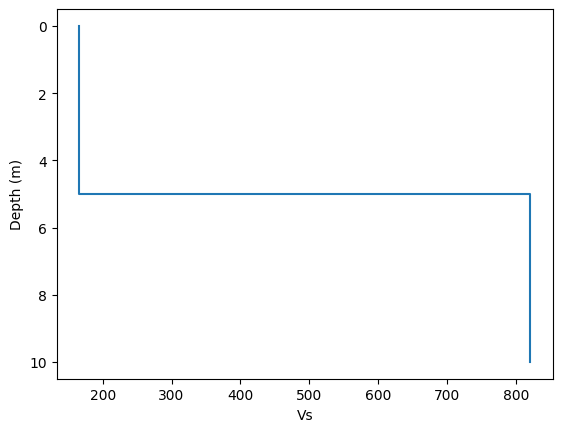

In [10]:
plt.figure()
plt.step(Vs, np.arange(0, len(Vs)*5, 5), where='post')
plt.xlabel('Vs')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()

In [ ]:
freq_1, TF_1 = TTF.TTF(data_0.iloc[:,2].values, data_0.iloc[:,1].values, dt=1e-5)
#freq_2, TF_2 = TTF.TTF(data_1.iloc[:,2].values, data_1.iloc[:,1].values, dt=1e-5)

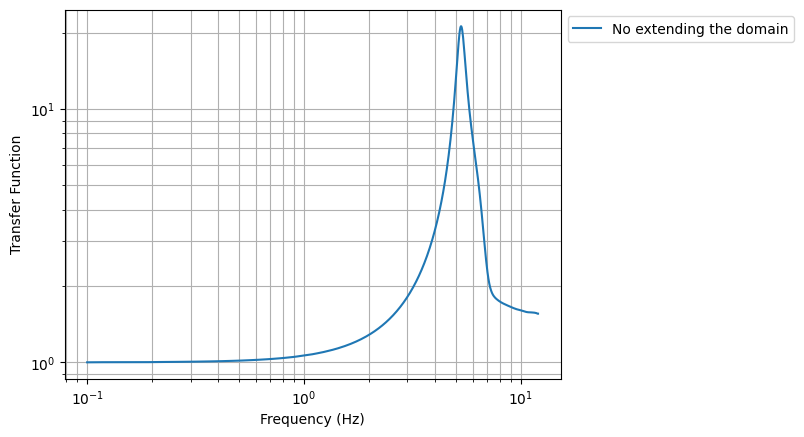

In [ ]:
plt.loglog(freq_1, TF_1, label="No extending the domain")
#plt.loglog(freq_2, TF_2, label="Extending the domain in x direction")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Transfer Function")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(which='both')
plt.show()

In [ ]:
# Read Vs profiles

file_path = "./results/Vs_shallow_0_0.3_50.csv"
Vs_1 = pd.read_csv(file_path, header=None).values

file_path = "./results/Vs_shallow_1_0.3_50.csv"
Vs_2 = pd.read_csv(file_path, header=None).values


FileNotFoundError: [Errno 2] No such file or directory: './results/Vs_shallow_1_0.3_50.csv'

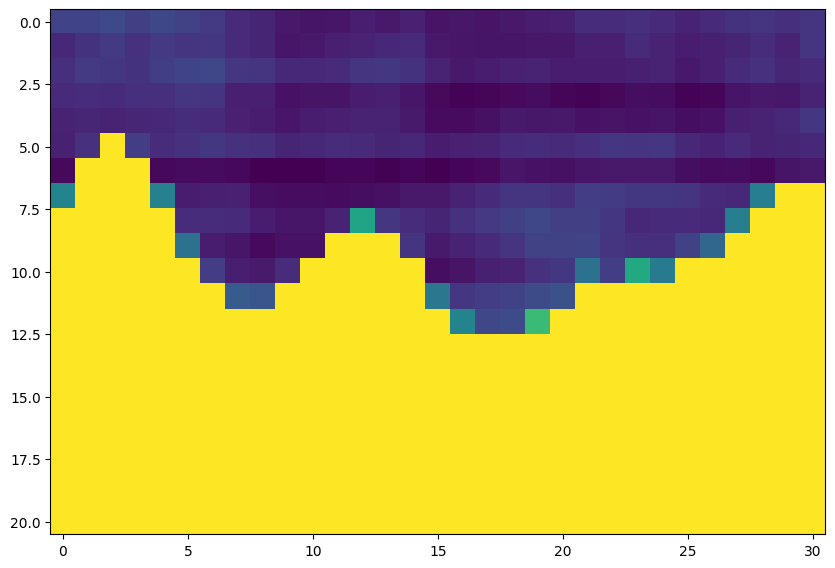

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(Vs_1)

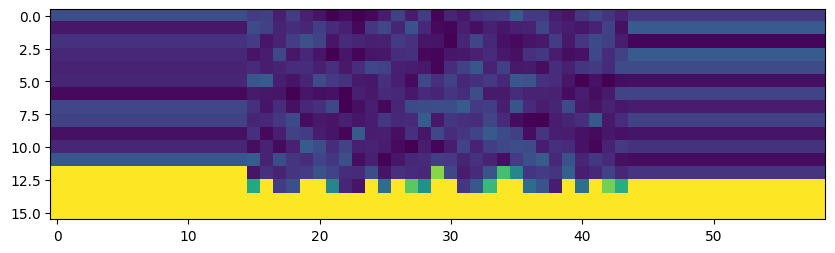

In [39]:
plt.figure(figsize=(10,10)) 
plt.imshow(Vs_3)

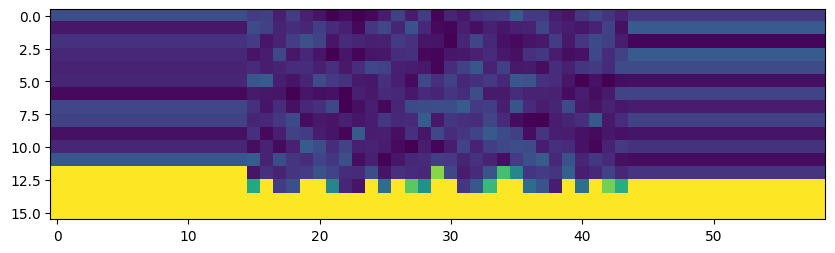

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(Vs_3)

# Surface acc.

In [14]:
def surface_acc_plot(file_path, title=""):
    data = pd.read_csv(file_path)
    t_data = data.iloc[:,0].values
    acc_data = data.iloc[:,1:].values
    scale = 1.5
    for i, wave in enumerate(acc_data.T):
        plt.plot( wave*scale + 2.5*i, t_data, color="gray")
    plt.xlabel("Position")
    plt.ylabel("Time")
    plt.title(title)
    plt.show()

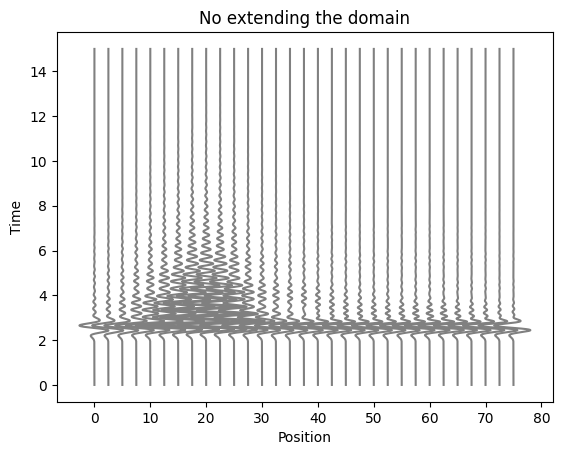

In [15]:
file_path = "./results/Data_0.000_surface.csv"

surface_acc_plot(file_path, title="No extending the domain")

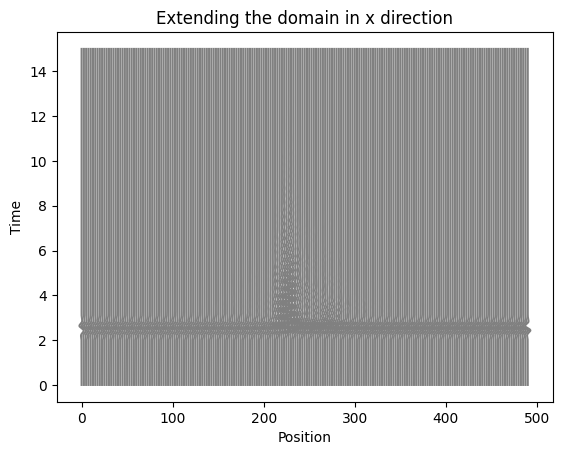

In [16]:
file_path = "./results/Data_1.000_surface.csv"

surface_acc_plot(file_path, title="Extending the domain in x direction")

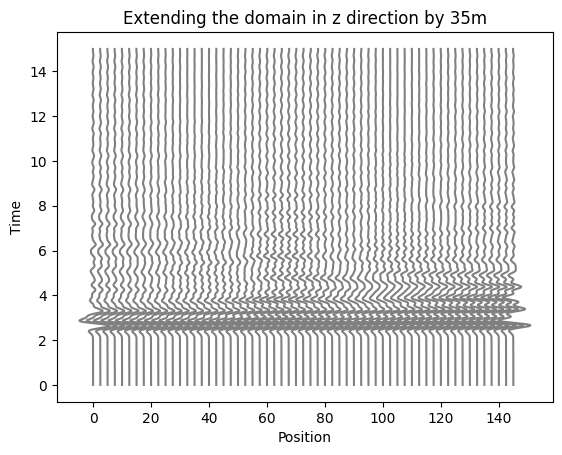

In [17]:
file_path = "./results/Data_2.000_surface.csv"

surface_acc_plot(file_path, title="Extending the domain in z direction by 35m")

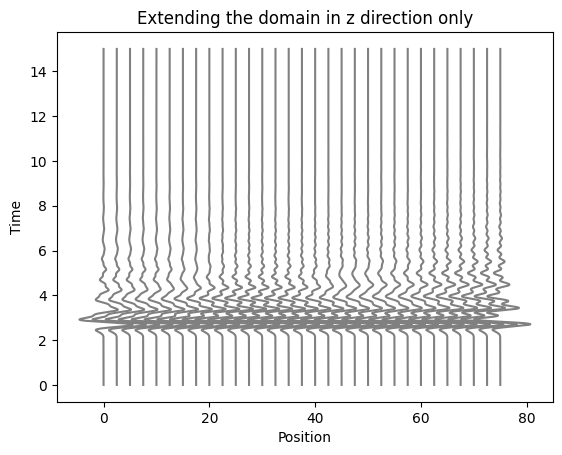

In [18]:
file_path = "./results/Data_3.000_surface.csv"

surface_acc_plot(file_path, title="Extending the domain in z direction only")